In [ ]:
#!pip install --upgrade tensorflow
!pip install keras==2.12.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.plotting.register_matplotlib_converters()



df4 = '/content/drive/MyDrive/AI Flood Alert Chatbot (1)/Metrological datasets/Sukkur_Daily_Data.csv'


df4 = pd.read_csv(df4)

df4

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,7,6,46,0.0,1017,15,10,63,3,Sukkur
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,10,8,47,0.0,1016,13,10,65,5,Sukkur
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,11,2,46,0.0,1018,14,10,99,5,Sukkur
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,3,4,28,0.0,1019,18,10,49,3,Sukkur
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,9,32,23,0.0,1016,22,10,82,5,Sukkur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43803,2023-12-30 09:00:00,27,16,0,10,6,76,08:43 PM,09:50 AM,07:15 AM,...,12,0,25,0.0,1018,19,10,71,8,Sukkur
43804,2023-12-30 12:00:00,27,16,0,10,6,76,08:43 PM,09:50 AM,07:15 AM,...,10,3,17,0.0,1017,25,10,46,9,Sukkur
43805,2023-12-30 15:00:00,27,16,0,10,6,76,08:43 PM,09:50 AM,07:15 AM,...,10,5,15,0.0,1014,27,10,32,8,Sukkur
43806,2023-12-30 18:00:00,27,16,0,10,6,76,08:43 PM,09:50 AM,07:15 AM,...,17,9,20,0.0,1014,22,10,46,8,Sukkur


In [ ]:
df4['pressure'].mean()

1006.6198639517896

In [ ]:
df4['pressure'].std()

8.312438989916423

#Features


1.  **maxtempC**
2.  **mintempC**
3.  **totalSnow_cm**
4.  **sunHour**
5.  **uvIndex**
6.  **uvIndex**
7.  **moon_illumination**
8.  **moonrise**
9.  **moonset**
10. **sunrise**
11. **sunset**
12. **DewPointC**
13. **FeelsLikeC**
14. **HeatIndexC**
15. **WindChillC**
16. **WindGustKmph**
17. **cloudcover**
18. **humidity**
19. **precipMM**
20. **pressure**
21. **tempC**
21. **visibility**
22. **winddirDegree**
23. **windspeedKmph**

In [ ]:
df4.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm           int64
sunHour                int64
uvIndex                int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
location              object
dtype: object

In [ ]:
df4.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

In [ ]:
df4.isnull().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
location             0
dtype: int64

In [ ]:
df4.nunique()


date_time            43808
maxtempC                37
mintempC                32
totalSnow_cm             1
sunHour                 14
uvIndex                  8
moon_illumination      101
moonrise              1400
moonset               1397
sunrise                128
sunset                 173
DewPointC               57
FeelsLikeC              59
HeatIndexC              56
WindChillC              50
WindGustKmph            57
cloudcover             101
humidity                95
precipMM                72
pressure                45
tempC                   47
visibility               8
winddirDegree          361
windspeedKmph           40
location                 1
dtype: int64

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df4
# Convert 'date_time' column to datetime format if it's not already in datetime format
#df4['date_time'] = pd.to_datetime(df4['date_time'])

# Set 'date_time' column as the index
#df4.set_index('date_time', inplace=True)

# Resample the data on a daily basis, taking the mean for all columns except 'precipMM'
#daily_avg_df = df4.resample('D').mean()

# Sum 'precipMM' values for each day
#daily_avg_df['precipMM'] = df4['precipMM'].resample('D').sum()

# Resetting index to have 'date_time' as a column again
#daily_avg_df.reset_index(inplace=True)

# Display the resulting DataFrame
#print(daily_avg_df)


In [ ]:
#daily_avg_df.columns
X = df4.drop(['precipMM',   'moon_illumination', 'totalSnow_cm', 'moonrise', 'moonset', 'sunrise',  'sunset',  'visibility', 'sunHour'], axis=1)
X.head()

,date_time,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,winddirDegree,windspeedKmph,location
0,2009-01-01 00:00:00,23,13,5,3,16,15,16,7,6,46,1017,15,63,3,Sukkur
1,2009-01-01 03:00:00,23,13,5,2,13,13,13,10,8,47,1016,13,65,5,Sukkur
2,2009-01-01 06:00:00,23,13,5,3,15,14,15,11,2,46,1018,14,99,5,Sukkur
3,2009-01-01 09:00:00,23,13,5,8,18,18,18,3,4,28,1019,18,49,3,Sukkur
4,2009-01-01 12:00:00,23,13,5,9,22,24,22,9,32,23,1016,22,82,5,Sukkur


In [ ]:
#df4 = daily_avg_df
Y = df4['precipMM']
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43803    0.0
43804    0.0
43805    0.0
43806    0.0
43807    0.0
Name: precipMM, Length: 43808, dtype: float64

#EDA

In [ ]:
!pip install pandas seaborn


<ipython-input-87-7128d45b9789>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df4.corr()


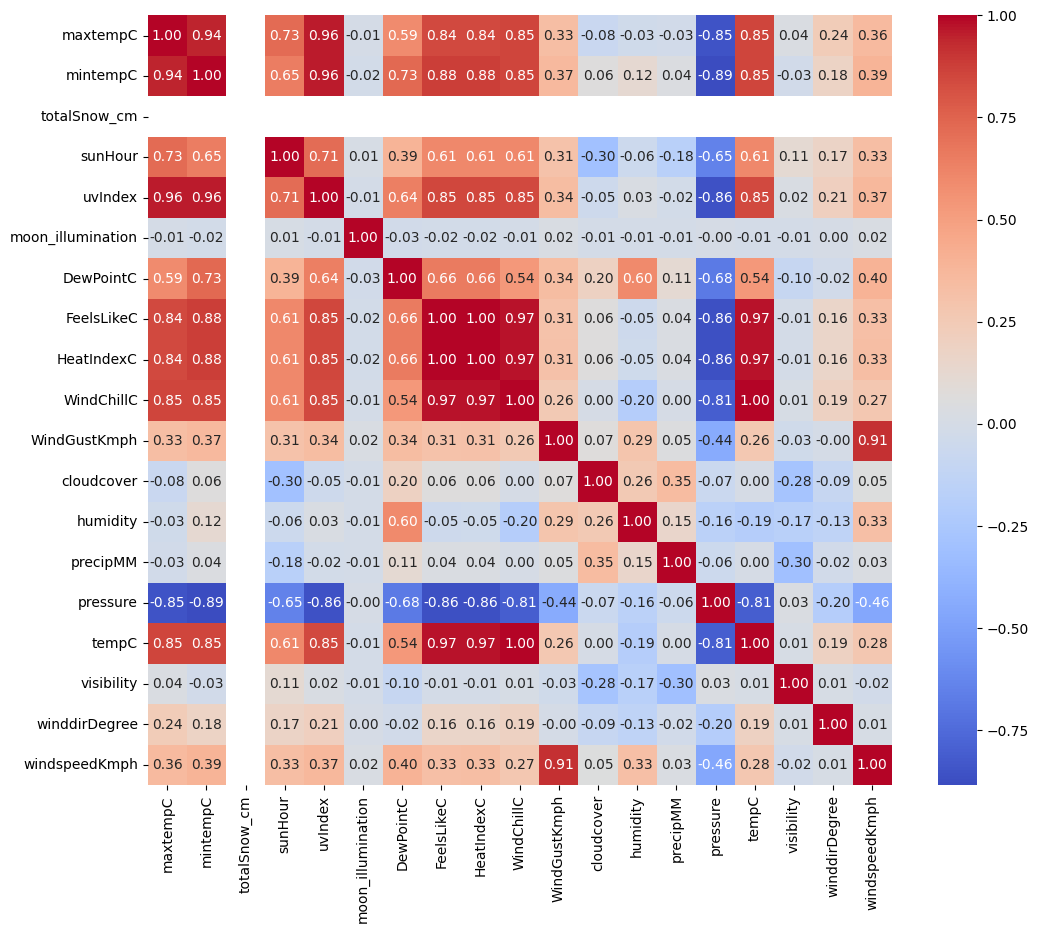

In [ ]:
correlation_matrix = df4.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# numerical_columns = ['maxtempC', 'mintempC', 'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
#                      'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
#                      'tempC', 'winddirDegree', 'windspeedKmph']

# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df4[column], bins=30, kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

#LSTM

#importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.plotting.register_matplotlib_converters()

#Preprocessing

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/AI Flood Alert Chatbot (1)/Metrological datasets/Sukkur_Daily_Data.csv')

# Drop the specified features
features_to_drop = ['totalSnow_cm', 'sunHour', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'location']
df4 = df4.drop(features_to_drop, axis=1)

# Check the first few rows of the modified dataset
print(df4.head())

             date_time  maxtempC  mintempC  uvIndex  DewPointC  FeelsLikeC  \
0  2009-01-01 00:00:00        23        13        5          3          16   
1  2009-01-01 03:00:00        23        13        5          2          13   
2  2009-01-01 06:00:00        23        13        5          3          15   
3  2009-01-01 09:00:00        23        13        5          8          18   
4  2009-01-01 12:00:00        23        13        5          9          22   

   HeatIndexC  WindChillC  WindGustKmph  cloudcover  humidity  precipMM  \
0          15          16             7           6        46       0.0   
1          13          13            10           8        47       0.0   
2          14          15            11           2        46       0.0   
3          18          18             3           4        28       0.0   
4          24          22             9          32        23       0.0   

   pressure  tempC  visibility  winddirDegree  windspeedKmph  
0      1017     1

# Separate 'date_time' column



In [ ]:
date_time_column = df4['date_time']
df4 = df4.drop('date_time', axis=1)
df4

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,23,13,5,3,16,15,16,7,6,46,0.0,1017,15,10,63,3
1,23,13,5,2,13,13,13,10,8,47,0.0,1016,13,10,65,5
2,23,13,5,3,15,14,15,11,2,46,0.0,1018,14,10,99,5
3,23,13,5,8,18,18,18,3,4,28,0.0,1019,18,10,49,3
4,23,13,5,9,22,24,22,9,32,23,0.0,1016,22,10,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43803,27,16,6,-1,19,19,19,12,0,25,0.0,1018,19,10,71,8
43804,27,16,6,-2,24,24,25,10,3,17,0.0,1017,25,10,46,9
43805,27,16,6,-2,25,25,27,10,5,15,0.0,1014,27,10,32,8
43806,27,16,6,-2,22,22,22,17,9,20,0.0,1014,22,10,46,8


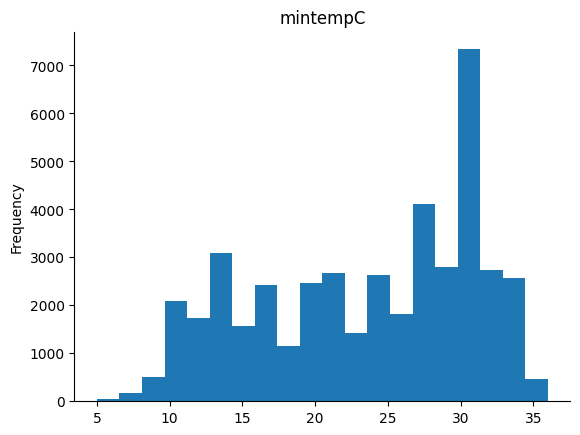

In [ ]:
# @title mintempC

from matplotlib import pyplot as plt
df4['mintempC'].plot(kind='hist', bins=20, title='mintempC')
plt.gca().spines[['top', 'right',]].set_visible(False)

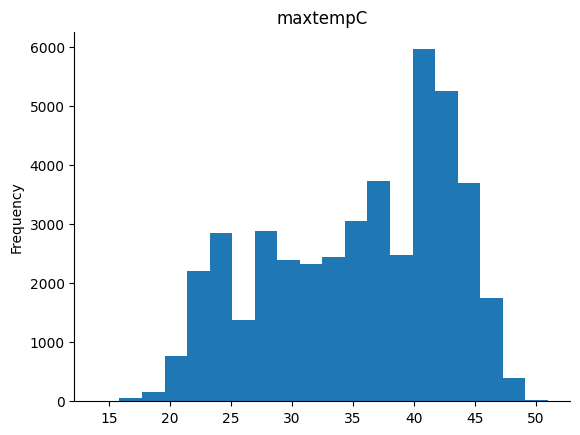

In [ ]:
# @title maxtempC

from matplotlib import pyplot as plt
df4['maxtempC'].plot(kind='hist', bins=20, title='maxtempC')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Prepare the data

In [ ]:
X = df4.drop(columns=['precipMM']).values
Y = df4['precipMM'].values.reshape(-1, 1)

In [ ]:
print(X.shape)
print(Y.shape)

(43808, 15)
(43808, 1)


In [ ]:
X

array([[23, 13,  5, ..., 10, 63,  3],
       [23, 13,  5, ..., 10, 65,  5],
       [23, 13,  5, ..., 10, 99,  5],
       ...,
       [27, 16,  6, ..., 10, 32,  8],
       [27, 16,  6, ..., 10, 46,  8],
       [27, 16,  6, ..., 10, 70, 12]])

In [ ]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Sc_X = MinMaxScaler()
sc_x = StandardScaler()


X1 = sc_x.fit_transform(X)


# Split the data into training and testing sets

In [ ]:
X_train1, X_test, Y_train1, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train1, Y_train1, test_size=0.28, random_state=42)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(22078, 15)
(22078, 1)
(8587, 15)
(8587, 1)
(13143, 15)
(13143, 1)


In [ ]:
print(X_train)

[[ 0.87296808  0.32718611  0.46252397 ...  0.09870479  0.34736101
  -0.63184772]
 [-1.68050651 -1.83129126 -1.49581206 ...  0.09870479  2.16974873
  -0.44571374]
 [ 0.46978788  0.59699578  0.46252397 ...  0.09870479 -1.4750267
   0.11268822]
 ...
 [ 0.87296808  0.73190061  0.46252397 ...  0.09870479  1.82372574
  -0.81798171]
 [-1.41171971 -1.42657675 -1.49581206 ...  0.09870479 -0.59843515
  -1.00411569]
 [-1.14293291 -1.29167192 -1.49581206 ...  0.09870479 -1.5788336
  -0.07344577]]


# Reshape Y_train and Y_test to make them 2D arrays

In [ ]:
# Reshape the data for LSTM input (samples, time steps, features)
#here I am reshaping training data where X-train[0] is first element which is 22078

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

#here I am reshaping Validation data where X_val[0] is 8587 X_val[1] is 15 so it is (8587, 15)
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

#here I am reshaping testing data to 3D where X_test[0], X_test[1] is (13143, 15) and 1 is timestep
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)
print(X_test_reshaped.shape)

(22078, 1, 15)
(8587, 1, 15)
(13143, 1, 15)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(20, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])


In [ ]:
#from keras import layers
#model = Sequential()

#model.add(layers.Bidirectional(LSTM(units=64, activation='relu')))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(512,activation="relu"))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(256,activation="relu"))
#model.add(Dense(units=1))  # Assuming you want to predict 1 features
#model.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError', 'accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train_reshaped, Y_train, epochs=80, batch_size=64, validation_data=(X_val_reshaped, Y_val) )

Epoch 1/80
345/345 [==============================] - 3s 4ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 2/80
345/345 [==============================] - 2s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 3/80
345/345 [==============================] - 2s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 4/80
345/345 [==============================] - 2s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 5/80
345/345 [==============================] - 4s 10ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 6/80
345/345 [==============================] - 4s 12ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 7/80
345

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                2880      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test_reshaped, Y_test)
print(f'Mean Squared Error on Test Data: {loss}')


411/411 [==============================] - 1s 3ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Mean Squared Error on Test Data: [0.023797305300831795, 0.023797305300831795]


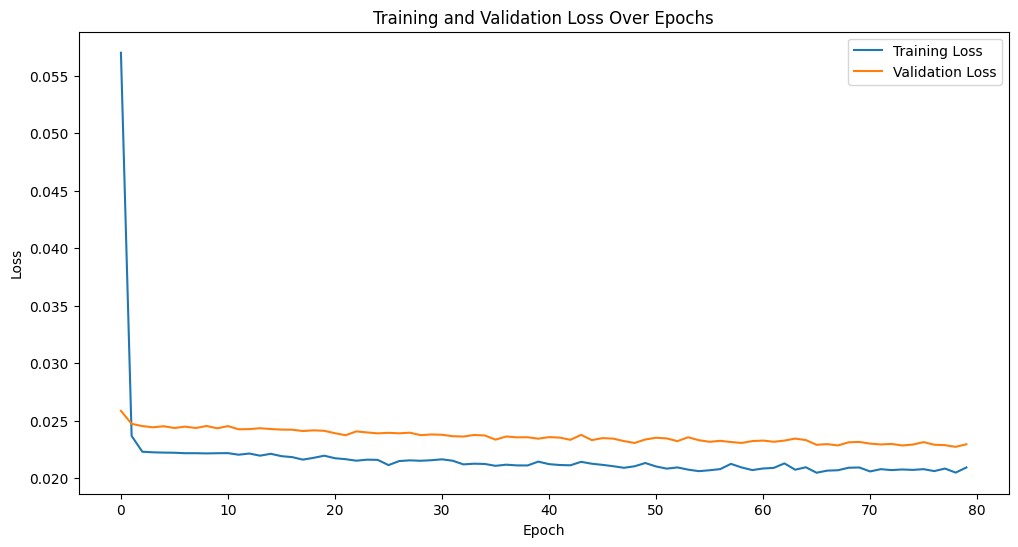

In [ ]:
# Print training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your model is already trained and named 'model'
# Assuming X_test_reshaped is your reshaped test data
predictions = model.predict(X_test_reshaped)

# Assuming Y_test contains the actual rainfall values for your test data
# Evaluate regression metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')


411/411 [==============================] - 2s 4ms/step
MAE: 0.023797288824265624, MSE: 0.0732805664592879, RMSE: 0.27070383532430403, R2: 0.19189173807811344


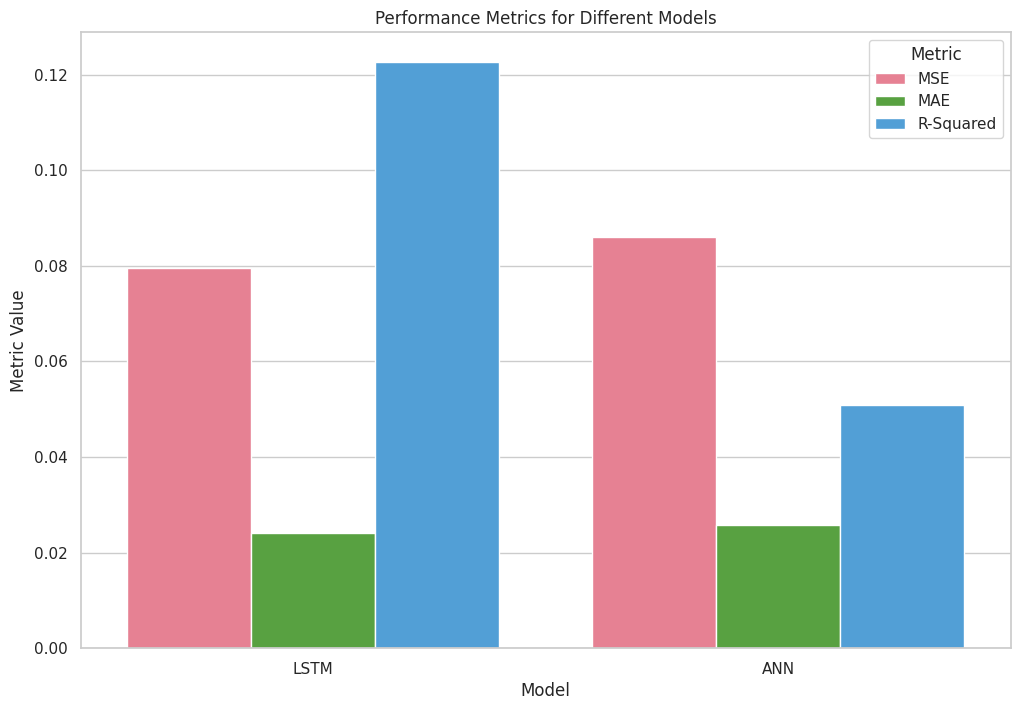

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Values for the models
model_names = ['LSTM', 'ANN']
mse_values = [0.07955380828, 0.08606303426]
mae_values = [0.02402483139, 0.0258373926]
r_squared_values = [0.1227129805, 0.05093188555]

# Create a DataFrame for easy plotting with seaborn
import pandas as pd
data = pd.DataFrame({
    'Model': model_names * 3,
    'Metric': ['MSE'] * 2 + ['MAE'] * 2 + ['R-Squared'] * 2,
    'Value': mse_values + mae_values + r_squared_values
})

# Set seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("husl", 3)  # Adjust the number of colors as needed

# Plotting using seaborn with a different color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=data, palette=colors)
plt.title('Performance Metrics for Different Models')
plt.ylabel('Metric Value')
plt.show()
